# Regresja liniowa

In [33]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

# Zadanie 1.
Wczytaj dane z pliku dab.csv oraz wyznacz równanie regresji obajśniającej wiek drzewa. 
Znajdź współczynniki regresji rozwiązując równanie normalne  $X^TX=X^Ty$ . Wcześniej odpowiednio przygotuj dane do pracy. 
Wyniki zilustruj odpowiednim rysunkiem.

## Przykład 1
Proszę narysować wykres dowolnej funkcji na odcinku $[0,3]$.
Będzie to model, który będziemy chcieli znaleźć.

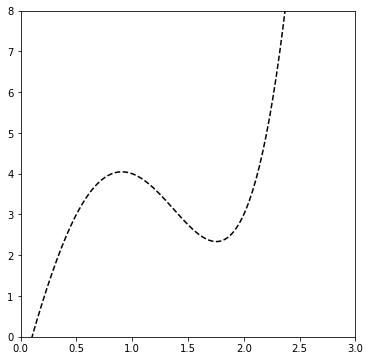

In [54]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x_tr = np.linspace(0, 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr[:200], y_tr[:200], '--k');
plt.show()

# Przykład 2


Proszę wylosować kilka punktów z otoczenia funkcji $f(x)$.
Na ich podstawie będziemy wykonywać predykcję.

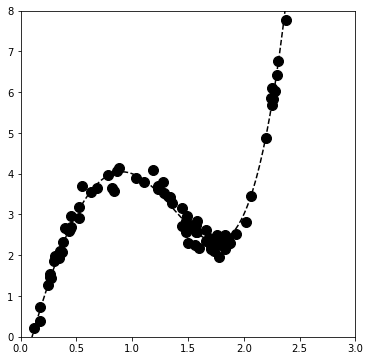

In [55]:
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,0.2).rvs(len(x))
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Zadanie 2
Nauczmy prosty model regresji liniowej
$$
y=a\cdot x + b
$$
na naszych danych.
Oraz narysujmy prostą regresji. My narazie urzyjemy metody opartej na rozwiązaniu układu równań liniowych

```python
M1 = np.vstack( (np.ones_like(x), x) ).T
p1 = np.linalg.lstsq(M1, y)
```

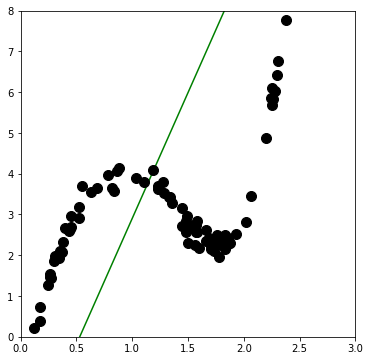

## Zadanie 3
Nauczmy prosty model regresji
$$
y=a_1\cdot x + a_2 \cdot x^2 + b
$$
na naszych danych.
Oraz narysujmy prostą regresji.

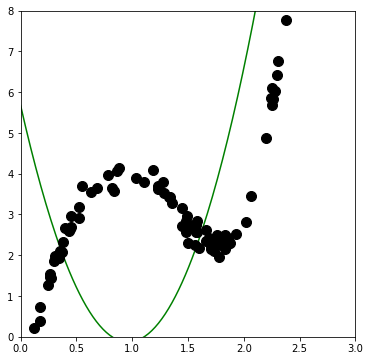

## Zadanie 4

Nauczmy prosty model regresji
$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + b
$$
na naszych danych.
Oraz narysujmy prostą regresji.

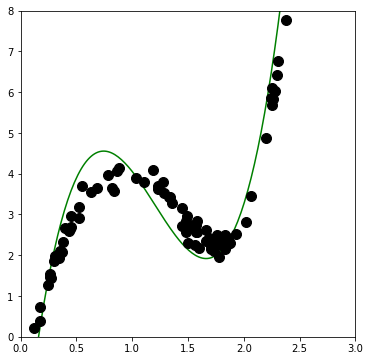

## Zadanie 6

Nauczmy prosty model regresji
$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + a_4 \cdot x ^4 + b
$$
na naszych danych.
Oraz narysujmy prostą regresji.

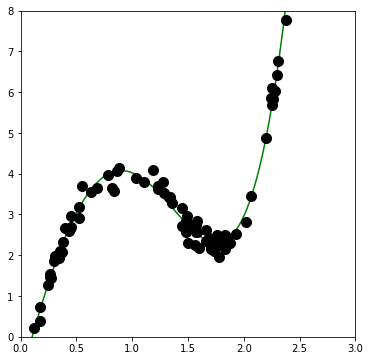

## Zadanie 7

Nauczmy prosty model regresji
$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + a_4 \cdot x ^4 + a_5 \cdot x^5 + b
$$
na naszych danych.
Oraz narysujmy prostą regresji.

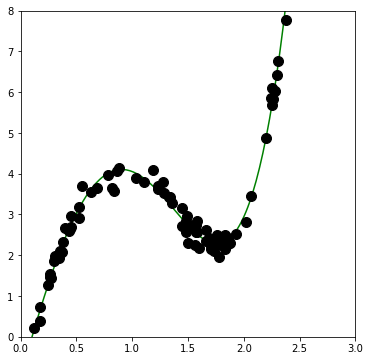

## Zadanie 7

Narysuj wszystkie wyniki na jednym wykresie.

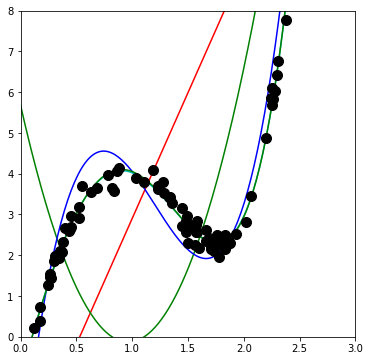

# Zadanie 9
Użyj funkcji 

```python
Res1 = sm.OLS(y, M1).fit()
sm.OLS(y, M1).fit()
Res1.summary2()
```
z pakietu 

```python
import statsmodels.api as sm
```
aby wyświetlić miary dopasowania wszystkich powyższych modeli.


# Zadanie 10
Użyj funkcji 

```python
x1=np.vstack(x)
model1 = linear_model.LinearRegression()
model1.fit(x1, y)
```
z pakietu 

```python
import sklearn.linear_model
```
aby dopasowac model liniowy.


## Cross validation

In [14]:
from sklearn import model_selection
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## Zadanie 11

Wykonaj k-fold cross-validation dla:

  * regrsji linowej
  * regrsji wielomianowej stopnia 2
  * regrsji wielomianowej stopnia 3
  * regrsji wielomianowej stopnia 4
  * regrsji wielomianowej stopnia 5
  * regrsji wielomianowej stopnia 25

oraz podaj uśrednione wartości dla każdej z nich oraz wykonaj barplot.

In [ ]:
# prepare models
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('PR2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))

# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_absolute_error'
#scoring = 'r2'

In [ ]:
seed=100
x=np.vstack(x)
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

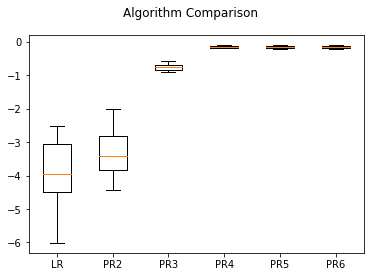

In [17]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Zadanie 12

Wykonaj k-fold cross-validation dla $k = [1, 2, 3, 4, 5, 6, 7]$
oraz wyznacz optymalny parametr regresji za pomocą 

```python
GridSearchCV
```
z pakietu

```python
from sklearn.model_selection import GridSearchCV
```

{'polynomialfeatures__degree': 4}

## Zadanie 13

Znajdź optymalny model regresji liniowej dla danych Boston.

In [27]:
boston = datasets.load_boston()

# get the data
x = boston.data
y = boston.target

# Przykład
W poniższym przykładzie przedstawiamy wartości dopasowane w modelu regresji liniowej.

In [ ]:
import numpy as np
y=np.array([1,3,4,5])
x=np.array([[2],[1],[1],[0]])

from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(x,y)

y_fit = reg.predict(x)
print(y_fit)

## Zadanie 14

Zdobądź jak największe dane historyczne dotyczące ceny holdingu HSBC(np. ze strony yahoo finance).
Sprawdź przy pomocy regresji liniowej jaka jest zależność pomiędzy ilością tranzakcji (tzw. wolumenem), a rozpiętością dziennych notowań.
Podaj $R^2$ oraz wariancje modelu. Całość zilustruj odpowiednim rysunkeim.